<a href="https://colab.research.google.com/github/rajeevan094/machinelearnig/blob/main/expno4/scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Roll No:24BAD094

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("spam.csv", encoding='latin-1')

df = df[['v1', 'v2']]
df.columns = ['Label', 'Message']

df.head()


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['Clean_Message'] = df['Message'].apply(clean_text)


In [5]:
le = LabelEncoder()
df['Label_Encoded'] = le.fit_transform(df['Label'])
# spam=1, ham=0


In [6]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Clean_Message'])


In [8]:
y = df['Label_Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model = MultinomialNB(alpha=1.0)  # Laplace smoothing
model.fit(X_train, y_train)


MultinomialNB()

In [10]:
y_pred = model.predict(X_test)


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.97847533632287


In [12]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.91      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



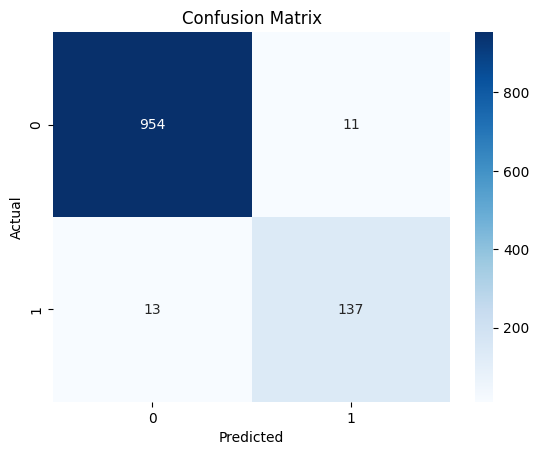

In [13]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [14]:
misclassified = df.iloc[y_test.index][y_test != y_pred]
misclassified[['Message', 'Label']].head()


,Message,Label
4730,K:)eng rocking in ashes:),ham
4328,1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cance...,ham
4700,I liked the new mobile,ham
2317,Waqt se pehle or naseeb se zyada kisi ko kuch ...,ham
3979,ringtoneking 84484,spam


In [15]:
feature_names = vectorizer.get_feature_names_out()
spam_probs = model.feature_log_prob_[1]

top_spam_indices = np.argsort(spam_probs)[-20:]
top_spam_words = feature_names[top_spam_indices]

print("Top Words Influencing Spam:")
print(top_spam_words)


Top Words Influencing Spam:
['service' 'contact' 'tone' 'win' 'urgent' 'send' 'nokia' 'cash' 'new'
 'won' 'just' 'prize' 'reply' 'text' 'stop' 'claim' 'mobile' 'ur' 'txt'
 'free']


In [16]:
spam_messages = df[df['Label'] == 'spam']['Clean_Message']
ham_messages = df[df['Label'] == 'ham']['Clean_Message']

spam_vector = CountVectorizer(stop_words='english').fit_transform(spam_messages)
ham_vector = CountVectorizer(stop_words='english').fit_transform(ham_messages)

spam_freq = np.sum(spam_vector.toarray(), axis=0)
ham_freq = np.sum(ham_vector.toarray(), axis=0)

print("Top Spam Word Frequency:", spam_freq[:10])
print("Top Ham Word Frequency:", ham_freq[:10])


Top Spam Word Frequency: [2 1 1 1 2 1 4 2 1 1]
Top Ham Word Frequency: [1 9 1 1 1 1 3 4 1 1]


In [17]:
for alpha in [0.1, 0.5, 1.0, 2.0]:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Alpha {alpha} Accuracy:", accuracy_score(y_test, y_pred))


Alpha 0.1 Accuracy: 0.9757847533632287
Alpha 0.5 Accuracy: 0.9757847533632287
Alpha 1.0 Accuracy: 0.97847533632287
Alpha 2.0 Accuracy: 0.979372197309417
